In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Weather conditions and accident severity

In [5]:
df_wac = df[['weather_conditions', 'accident_severity']]
df_wac


,weather_conditions,accident_severity
0,1,3
1,1,3
6,1,3
7,1,3
8,1,3
...,...,...
285307,1,3
285312,2,3
285313,2,3
285314,2,3


In [6]:
indexNames8 = df_wac[df_wac['weather_conditions'] == 8].index
indexNames9 = df_wac[df_wac['weather_conditions'] == 9].index

df_wac.drop(indexNames8, inplace=True)
df_wac.drop(indexNames9, inplace=True)
df_wac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,weather_conditions,accident_severity
0,1,3
1,1,3
6,1,3
7,1,3
8,1,3
...,...,...
285307,1,3
285312,2,3
285313,2,3
285314,2,3


In [7]:
df_wac['accident_severity'].value_counts()

3    94014
2    13016
1      864
Name: accident_severity, dtype: int64

In [8]:
df_wac['weather_conditions'].replace(1, 'Fine no wind', inplace=True)
df_wac['weather_conditions'].replace(2, 'Rain no wind', inplace=True)
df_wac['weather_conditions'].replace(3, 'Snow no wind', inplace=True)
df_wac['weather_conditions'].replace(4, 'Fine high wind', inplace=True)
df_wac['weather_conditions'].replace(5, 'Rain high wind', inplace=True)
df_wac['weather_conditions'].replace(6, 'Snow high wind', inplace=True)
df_wac['weather_conditions'].replace(7, 'Fog or mist', inplace=True)
df_wac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,weather_conditions,accident_severity
0,Fine no wind,3
1,Fine no wind,3
6,Fine no wind,3
7,Fine no wind,3
8,Fine no wind,3
...,...,...
285307,Fine no wind,3
285312,Rain no wind,3
285313,Rain no wind,3
285314,Rain no wind,3


In [9]:
df_wac3 = df_wac[df_wac['accident_severity'] == 3]
df_wac2 = df_wac[df_wac['accident_severity'] == 2]
df_wac1 = df_wac[df_wac['accident_severity'] == 1]


df_wac3

,weather_conditions,accident_severity
0,Fine no wind,3
1,Fine no wind,3
6,Fine no wind,3
7,Fine no wind,3
8,Fine no wind,3
...,...,...
285307,Fine no wind,3
285312,Rain no wind,3
285313,Rain no wind,3
285314,Rain no wind,3


In [10]:
print(df_wac3['weather_conditions'].unique())
print(df_wac2['weather_conditions'].unique())
print(df_wac1['weather_conditions'].unique())

['Fine no wind' 'Rain no wind' 'Fine high wind' 'Rain high wind'
 'Snow no wind' 'Snow high wind' 'Fog or mist']
['Fine no wind' 'Rain no wind' 'Rain high wind' 'Fog or mist'
 'Fine high wind' 'Snow no wind' 'Snow high wind']
['Fine no wind' 'Rain no wind' 'Fine high wind' 'Snow no wind'
 'Fog or mist' 'Rain high wind']


In [12]:
X = df_wac3['weather_conditions'].unique()
X

array(['Fine no wind', 'Rain no wind', 'Fine high wind', 'Rain high wind',
       'Snow no wind', 'Snow high wind', 'Fog or mist'], dtype=object)

In [13]:
print(df_wac3['weather_conditions'].value_counts())


Fine no wind      79591
Rain no wind      10895
Fine high wind     1474
Rain high wind     1369
Fog or mist         360
Snow no wind        261
Snow high wind       64
Name: weather_conditions, dtype: int64


In [24]:
y3 = df_wac3['weather_conditions'].value_counts()
y3.to_frame()

,weather_conditions
Fine no wind,79591
Rain no wind,10895
Fine high wind,1474
Rain high wind,1369
Fog or mist,360
Snow no wind,261
Snow high wind,64


In [29]:
print(df_wac2['weather_conditions'].value_counts())
y2 = df_wac2['weather_conditions'].value_counts()
y2.to_list()

Fine no wind      11164
Rain no wind       1348
Fine high wind      210
Rain high wind      176
Fog or mist          77
Snow no wind         32
Snow high wind        9
Name: weather_conditions, dtype: int64


[11164, 1348, 210, 176, 77, 32, 9]

In [34]:
print(df_wac1['weather_conditions'].value_counts())
y1 = df_wac1['weather_conditions'].value_counts()
y1.to_frame()

Fine no wind      761
Rain no wind       66
Fine high wind     21
Rain high wind      8
Fog or mist         6
Snow no wind        2
Name: weather_conditions, dtype: int64


,weather_conditions
Fine no wind,761
Rain no wind,66
Fine high wind,21
Rain high wind,8
Fog or mist,6
Snow no wind,2


In [26]:
df_wactot = pd.DataFrame({'weather_conditions': y3})
df_wactot

,weather_conditions
Fine no wind,79591
Rain no wind,10895
Fine high wind,1474
Rain high wind,1369
Fog or mist,360
Snow no wind,261
Snow high wind,64


In [30]:
df_wactot.columns = ['accident severity 3']
df_wactot

,accident severity 3
Fine no wind,79591
Rain no wind,10895
Fine high wind,1474
Rain high wind,1369
Fog or mist,360
Snow no wind,261
Snow high wind,64


In [31]:
df_wactot.insert(1, 'accident severity 2', y2, True)
df_wactot

,accident severity 3,accident severity 2
Fine no wind,79591,11164
Rain no wind,10895,1348
Fine high wind,1474,210
Rain high wind,1369,176
Fog or mist,360,77
Snow no wind,261,32
Snow high wind,64,9


In [35]:
df_wactot.insert(2, 'accident severity 1', [761, 66, 21, 8, 6, 2, 0], True)
df_wactot

,accident severity 3,accident severity 2,accident severity 1
Fine no wind,79591,11164,761
Rain no wind,10895,1348,66
Fine high wind,1474,210,21
Rain high wind,1369,176,8
Fog or mist,360,77,6
Snow no wind,261,32,2
Snow high wind,64,9,0


Text(0.5, 1.0, 'How Weather Conditions Affect Accident Severity')

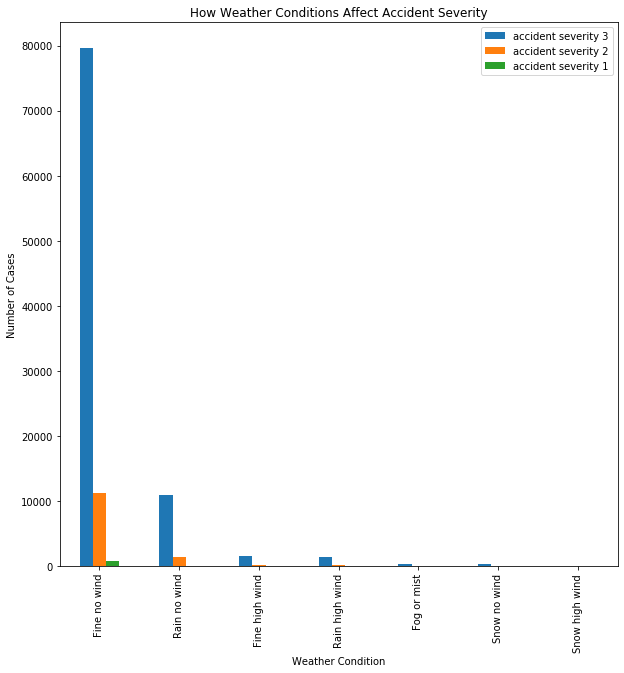

In [36]:
df_wactot.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Weather Condition')
plt.ylabel('Number of Cases')
plt.title('How Weather Conditions Affect Accident Severity')

In [37]:
df_wactot_mod = df_wactot
df_wactot_mod

,accident severity 3,accident severity 2,accident severity 1
Fine no wind,79591,11164,761
Rain no wind,10895,1348,66
Fine high wind,1474,210,21
Rain high wind,1369,176,8
Fog or mist,360,77,6
Snow no wind,261,32,2
Snow high wind,64,9,0


In [38]:
df_wactot_mod['accident severity 3'].replace({79591: 0}, inplace=True)
df_wactot_mod

,accident severity 3,accident severity 2,accident severity 1
Fine no wind,0,11164,761
Rain no wind,10895,1348,66
Fine high wind,1474,210,21
Rain high wind,1369,176,8
Fog or mist,360,77,6
Snow no wind,261,32,2
Snow high wind,64,9,0


Text(0.5, 1.0, 'How Weather Conditions Affect Accident Severity')

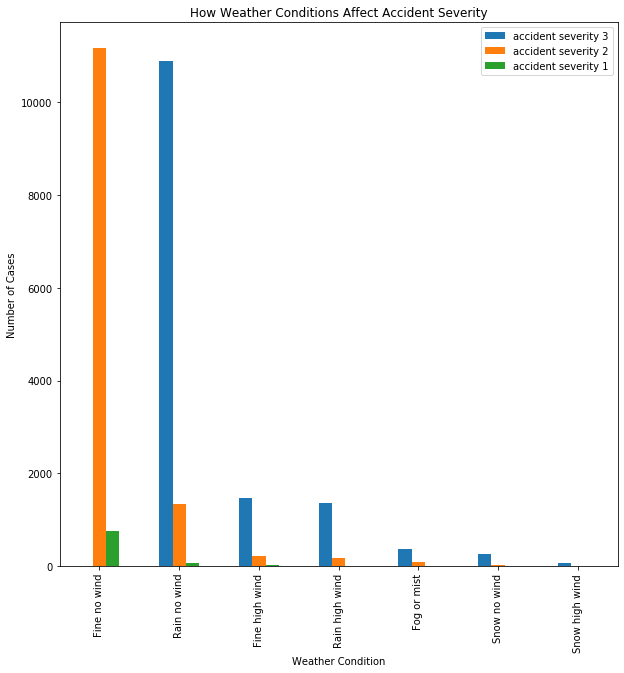

In [39]:
df_wactot_mod.plot(kind='bar', figsize=(10, 10))

plt.xlabel('Weather Condition')
plt.ylabel('Number of Cases')
plt.title('How Weather Conditions Affect Accident Severity')